# Cohort Analysis  ofUK E-Commerce in Python

For e-commerce establishments, cohort analysis plays an important role in understanding sales figures and customers. Cohort analysis refers to the separation of customers into "cohorts" based on their acquisition date or date of first purchase.


With this analysis, I hope to address two key questions:
1. How do you interpret and clean e-commerce data?
2. How do you create a simple cohort analysis to compare metrics across cohorts?

The dataset used here was drawn from the UCI Data Repository and contains 541,909 transactions of a UK-based non-store retail that sells all-occassion gifts.

In [33]:
import pandas as pd
import seaborn as sb
# import matplotlib
import matplotlib.pyplot as plt
from matplotlib import *
import sys
from pylab import *
import numpy as np
import missingno as msno
from textwrap import wrap

In [2]:
pd.__version__

'1.2.0'

In [2]:
data = pd.read_excel('online_retail_cohort_data.xlsx')

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
len(data)

541909

In [6]:
main_df = data
main_df.columns = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price', 'cust_id','country']
main_df['tot_order'] = main_df['quantity']*main_df['unit_price']
main_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [7]:
main_df.shape

(541909, 9)

<AxesSubplot:>

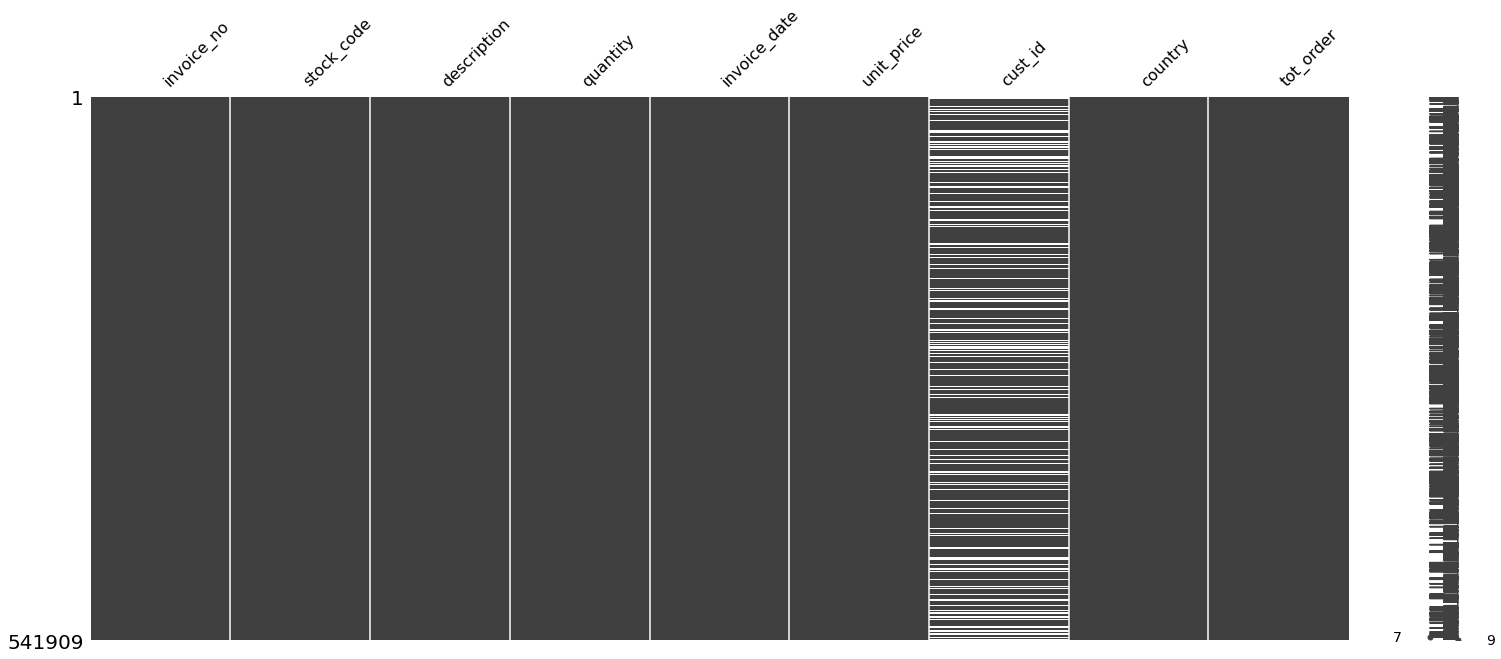

In [8]:
# find missing values
msno.matrix(main_df)

In [9]:
main_df = main_df[main_df['cust_id'].isna() == False]
# main_df.reset_index()
# main_df.drop(['index'], axis = 1, inplace=True)
main_df.shape

(406829, 9)

In [10]:
refund_df = main_df[main_df['tot_order'] < 0]
refund_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96


## Outliers

How about outliers in the data? Are there abnormally large order amounts? 


C:\Users\Govindji\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


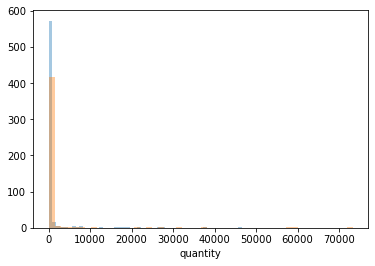

In [11]:
plt = sb.distplot(main_df['unit_price'].value_counts(), kde = False)
plt = sb.distplot(main_df['quantity'].value_counts(), kde = False)

In [12]:
main_df[['quantity', 'unit_price', 'tot_order']].describe()

,quantity,unit_price,tot_order
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,20.401854
std,248.693370,69.315162,427.591718
min,-80995.000000,0.000000,-168469.600000
25%,2.000000,1.250000,4.200000
50%,5.000000,1.950000,11.100000
75%,12.000000,3.750000,19.500000
max,80995.000000,38970.000000,168469.600000


In [13]:
#quick filterto find where outliers lie
main_df[(main_df['quantity'] > 1000) & (main_df['tot_order'] > 5000)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
52711,540815,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-01-11 12:55:00,2.10,15749.0,United Kingdom,6539.40
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.60
160546,550461,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,3114,2011-04-18 13:20:00,2.10,15749.0,United Kingdom,6539.40
348325,567423,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,1412,2011-09-20 11:05:00,5.06,17450.0,United Kingdom,7144.72
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60


In [14]:
main_df[main_df['tot_order'] == -168469.600000]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom,-168469.6


In [15]:
main_df.groupby('description').mean()['unit_price'].nlargest()

description
DOTCOM POSTAGE                    744.147500
PICNIC BASKET WICKER 60 PIECES    649.500000
CRUK Commission                   495.839375
Manual                            334.425634
REGENCY MIRROR WITH SHUTTERS      156.428571
Name: unit_price, dtype: float64

In [16]:
main_df[main_df['description'] == 'DOTCOM POSTAGE']['unit_price'].describe()

count      16.000000
mean      744.147500
std       540.829708
min        11.170000
25%       389.082500
50%       715.850000
75%       998.635000
max      1599.260000
Name: unit_price, dtype: float64

In [17]:
main_df[main_df['description'] == 'DOTCOM POSTAGE'].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
317507,564764,DOT,DOTCOM POSTAGE,1,2011-08-30 10:49:00,11.17,14096.0,United Kingdom,11.17
324002,565383,DOT,DOTCOM POSTAGE,1,2011-09-02 15:45:00,16.46,14096.0,United Kingdom,16.46
333755,566217,DOT,DOTCOM POSTAGE,1,2011-09-09 15:17:00,13.16,14096.0,United Kingdom,13.16
338829,566566,DOT,DOTCOM POSTAGE,1,2011-09-13 12:32:00,85.58,14096.0,United Kingdom,85.58
350599,567656,DOT,DOTCOM POSTAGE,1,2011-09-21 14:40:00,878.55,14096.0,United Kingdom,878.55


In [18]:
main_df[main_df['description'] == 'CRUK Commission']['unit_price'].describe()

count      16.000000
mean      495.839375
std       364.164786
min         1.600000
25%       284.252500
50%       471.770000
75%       668.977500
max      1100.440000
Name: unit_price, dtype: float64

In [19]:
main_df[main_df['description'] == 'CRUK Commission'].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
317508,C564763,CRUK,CRUK Commission,-1,2011-08-30 10:49:00,1.60,14096.0,United Kingdom,-1.60
324023,C565382,CRUK,CRUK Commission,-1,2011-09-02 15:45:00,13.01,14096.0,United Kingdom,-13.01
333779,C566216,CRUK,CRUK Commission,-1,2011-09-09 15:17:00,15.96,14096.0,United Kingdom,-15.96
338848,C566565,CRUK,CRUK Commission,-1,2011-09-13 12:32:00,52.24,14096.0,United Kingdom,-52.24
351003,C567655,CRUK,CRUK Commission,-1,2011-09-21 14:40:00,608.66,14096.0,United Kingdom,-608.66


In [20]:
main_df[main_df['description'] == 'Manual']['unit_price'].describe()

count      465.000000
mean       334.425634
std       1935.070401
min          0.000000
25%          0.850000
50%          3.000000
75%        106.400000
max      38970.000000
Name: unit_price, dtype: float64

In [21]:
main_df[(main_df['description'] == 'Manual') & (main_df['unit_price'] > 3000)]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
173391,C551699,M,Manual,-1,2011-05-03 14:12:00,6930.00,16029.0,United Kingdom,-6930.00
222681,C556445,M,Manual,-1,2011-06-10 15:31:00,38970.00,15098.0,United Kingdom,-38970.00
268027,C560372,M,Manual,-1,2011-07-18 12:26:00,4287.63,17448.0,United Kingdom,-4287.63
271151,C560647,M,Manual,-1,2011-07-20 11:31:00,3060.60,18102.0,United Kingdom,-3060.60
293842,C562647,M,Manual,-1,2011-08-08 12:56:00,3155.95,15502.0,United Kingdom,-3155.95
374542,569382,M,Manual,1,2011-10-03 16:44:00,3155.95,15502.0,United Kingdom,3155.95
406404,C571750,M,Manual,-1,2011-10-19 11:16:00,3949.32,12744.0,Singapore,-3949.32
406406,571751,M,Manual,1,2011-10-19 11:18:00,3949.32,12744.0,Singapore,3949.32
422351,573077,M,Manual,1,2011-10-27 14:13:00,4161.06,12536.0,France,4161.06
422375,C573079,M,Manual,-2,2011-10-27 14:15:00,4161.06,12536.0,France,-8322.12


In [22]:
main_df[main_df['description'] == 'Discount']['unit_price'].describe()

count      77.000000
mean       72.484545
std       219.271071
min         0.010000
25%        13.880000
50%        22.970000
75%        57.600000
max      1867.860000
Name: unit_price, dtype: float64

In [23]:
main_df[main_df['description'] == 'Discount'].head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
9038,C537164,D,Discount,-1,2010-12-05 13:21:00,29.29,14527.0,United Kingdom,-29.29
14498,C537597,D,Discount,-1,2010-12-07 12:34:00,281.00,15498.0,United Kingdom,-281.00
19392,C537857,D,Discount,-1,2010-12-08 16:00:00,267.12,17340.0,United Kingdom,-267.12
31134,C538897,D,Discount,-1,2010-12-15 09:14:00,5.76,16422.0,United Kingdom,-5.76


In [24]:
removed_cats = ['DOTCOM POSTAGE', 'CRUK Commission', 'Manual', 'POSTAGE']
main_df = main_df[~main_df['description'].isin(removed_cats)]
main_df.shape

(405136, 9)

In [25]:
main_df.groupby(['country','description']).sum()['tot_order'].nlargest(10)

country         description                       
United Kingdom  REGENCY CAKESTAND 3 TIER              103122.85
                WHITE HANGING HEART T-LIGHT HOLDER     88313.95
                JUMBO BAG RED RETROSPOT                75416.67
                PARTY BUNTING                          61952.58
                ASSORTED COLOUR BIRD ORNAMENT          52314.87
                CHILLI LIGHTS                          45155.61
                PICNIC BASKET WICKER 60 PIECES         39619.50
                PAPER CHAIN KIT 50'S CHRISTMAS         39596.73
                BLACK RECORD COVER FRAME               37799.42
                WOOD BLACK BOARD ANT WHITE FINISH      33408.76
Name: tot_order, dtype: float64

In [26]:
main_df.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
cust_id                float64
country                 object
tot_order              float64
dtype: object

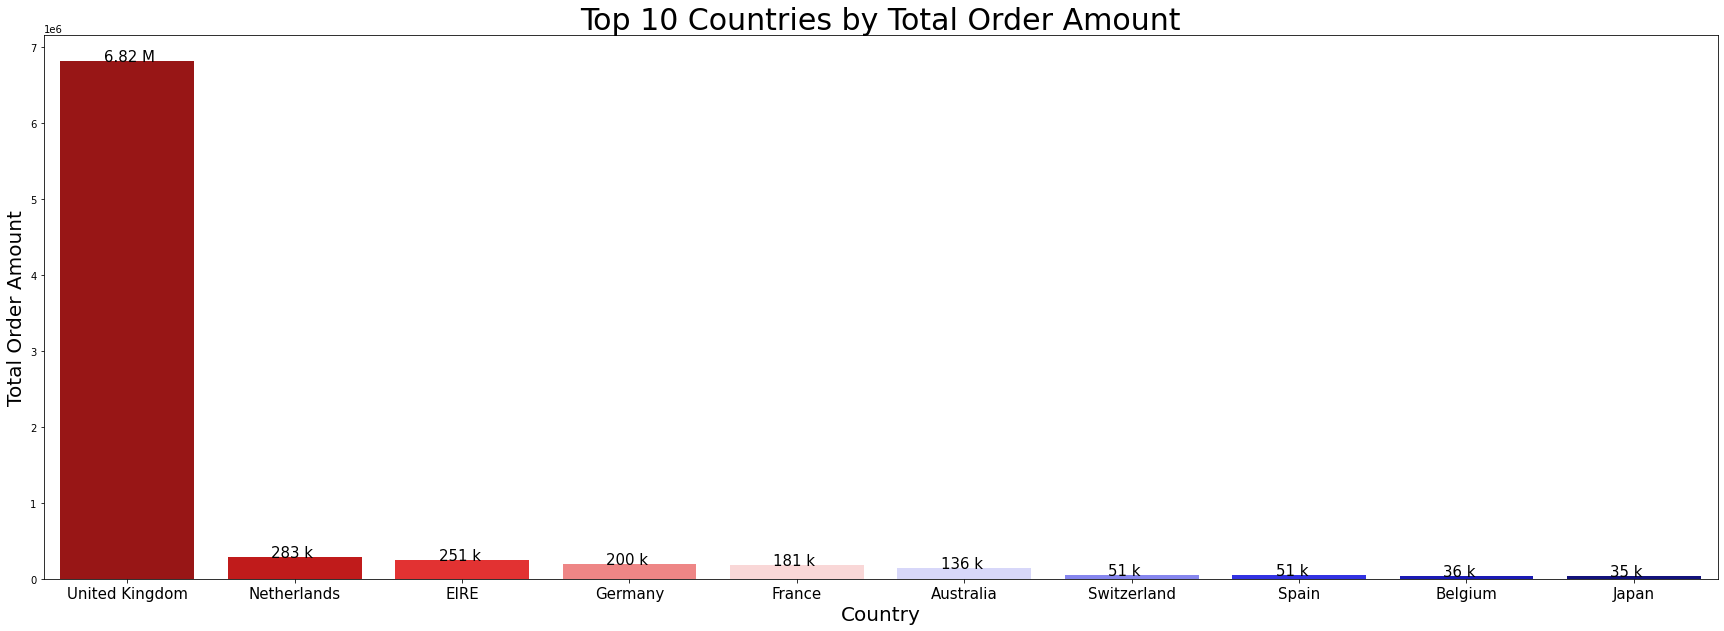

In [34]:
# total order amount by country
country_order = main_df.groupby('country').sum()['tot_order'].nlargest(10)

plt.figure(figsize = (30,10))
ax = sb.barplot(x = country_order.index, y = country_order.values, palette = 'seismic_r')
ax.set_xlabel('Country', fontsize = 20)
ax.set_ylabel('Total Order Amount', fontsize = 20)
ax.set_title('Top 10 Countries by Total Order Amount', fontsize = 30)

labels = [ '\n'.join(wrap(l, 15)) for l in country_order.index ]
ax.set_xticklabels(labels, fontsize = 15)

value_labels = []
for x in country_order.values:
    value_labels.append(str(int(x/1000))+' k')
value_labels[0] = '6.82 M'

for p, label in zip(ax.patches, value_labels):
    ax.annotate(label, (p.get_x() + 0.26, p.get_height() + 2), fontsize = 15)

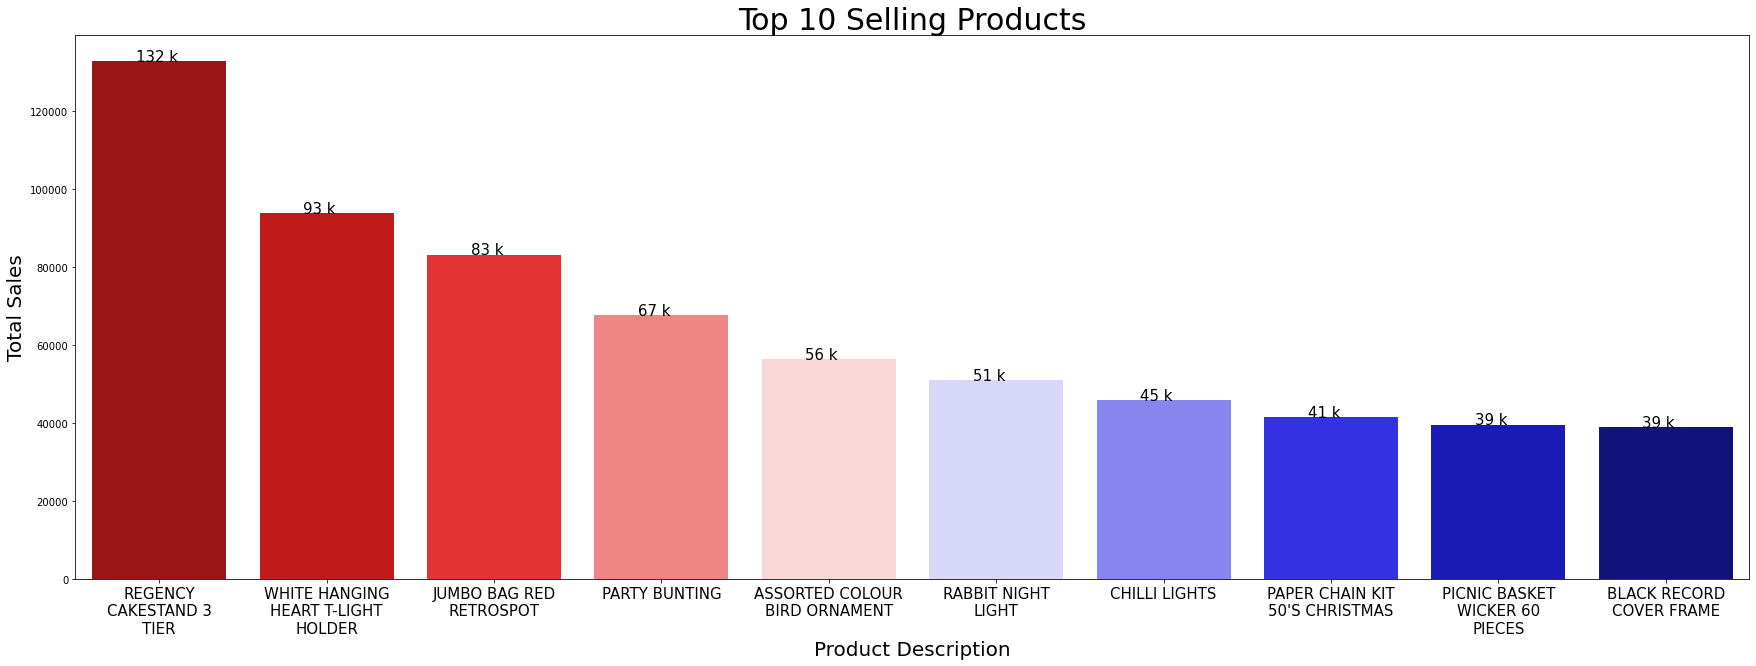

In [35]:
# top selling items by sales
sales_order = main_df.groupby('description').sum()['tot_order'].nlargest(10)

plt.figure(figsize = (30,10))
ax = sb.barplot(x = sales_order.index, y = sales_order.values, palette = 'seismic_r')
ax.set_xlabel('Product Description', fontsize = 20)
ax.set_ylabel('Total Sales', fontsize = 20)
ax.set_title('Top 10 Selling Products', fontsize = 30)

labels = [ '\n'.join(wrap(l, 15)) for l in sales_order.index ]
ax.set_xticklabels(labels, fontsize = 15)

value_labels = []
for x in sales_order.values:
    value_labels.append(str(int(x/1000))+' k')

for p, label in zip(ax.patches, value_labels):
    ax.annotate(label, (p.get_x() + 0.26, p.get_height() + 2), fontsize = 15)

With the top countries and products identified, we can now get into creating cohorts. 

## 1 Creating label for invoice period

We start off with creating a label for invoice date by applying strftime to the datetime object and creating a string representation of the year and month. 

In [29]:
main_df['invoice_period'] = main_df['invoice_date'].apply(lambda x: x.strftime('%Y-%m'))
main_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,cust_id,country,tot_order,invoice_period
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12


In [30]:
invoice_period_grouped = main_df.groupby('invoice_period')
invoice_period_agg = invoice_period_grouped.agg({'cust_id': pd.Series.nunique,
                       'description': pd.Series.nunique,
                      'quantity': np.sum,
                      'tot_order': np.sum})
invoice_period_agg.rename(columns ={'cust_id':'total_customers',
                         'description':'total_product_types',
                        'quantity':'total_units'}, inplace = True)
invoice_period_agg

,total_customers,total_product_types,total_units,tot_order
invoice_period,,,,
2010-12,948.0,2427,295957,549996.100
2011-01,780.0,2149,269139,472914.850
2011-02,794.0,2140,262820,434945.260
2011-03,1017.0,2248,343999,575002.240
2011-04,896.0,2234,278383,420368.331
2011-05,1077.0,2266,369059,651910.230
2011-06,1049.0,2366,356669,641967.370
2011-07,982.0,2390,363193,581676.861
2011-08,977.0,2395,386998,613232.000


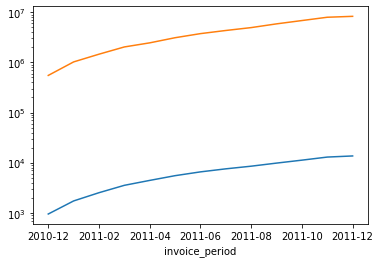

In [31]:
ax = invoice_period_agg['total_customers'].cumsum().plot()
ax2 = invoice_period_agg['tot_order'].cumsum().plot()
ax.set_yscale('log')

<AxesSubplot:xlabel='invoice_period'>

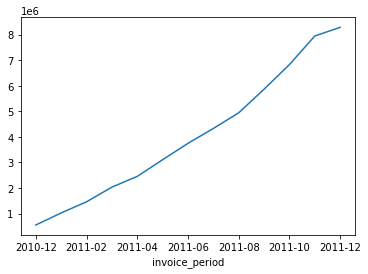

In [32]:
invoice_period_agg['tot_order'].cumsum().plot()

## 2 Creating a label for customer cohort group



In [36]:
main_df.set_index('cust_id', inplace = True)
main_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,tot_order,invoice_period
cust_id,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12


In [37]:
main_df['cohort_group'] = main_df.groupby(level=0)['invoice_date'].min().apply(lambda x: x.strftime('%Y-%m'))
main_df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,tot_order,invoice_period,cohort_group
cust_id,,,,,,,,,,
17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12


In [39]:
main_df.reset_index(inplace = True)
main_df.head()

,index,cust_id,invoice_no,stock_code,description,quantity,invoice_date,unit_price,country,tot_order,invoice_period,cohort_group
0,0,17850.0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom,15.30,2010-12,2010-12
1,1,17850.0,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
2,2,17850.0,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom,22.00,2010-12,2010-12
3,3,17850.0,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12
4,4,17850.0,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom,20.34,2010-12,2010-12


## 3 Aggregate metrics across cohort groups and invoice periods



In [40]:
grouped = main_df.groupby(['cohort_group','invoice_period'])
cohorts = grouped.agg({'cust_id': pd.Series.nunique,
                       'description': pd.Series.nunique,
                      'quantity': np.sum,
                      'tot_order': np.sum})
cohorts.rename(columns ={'cust_id':'total_customers',
                         'description':'total_product_types',
                        'quantity':'total_units'}, inplace = True)
cohorts.head()

total_customers  total_product_types  \
cohort_group invoice_period                                         
2010-12      2010-12                   948.0                 2427   
             2011-01                   361.0                 1833   
             2011-02                   316.0                 1719   
             2011-03                   366.0                 1868   
             2011-04                   340.0                 1792   

                             total_units  tot_order  
cohort_group invoice_period                          
2010-12      2010-12              295957  549996.10  
             2011-01              158817  269782.69  
             2011-02              137715  230727.57  
             2011-03              179302  300720.43  
             2011-04              130568  199453.49

## 4 Creating a label for invoice period within cohort groups

For cohort analysis, it is imperative to identify purchases across the lifetime of this customer. For example, if a customer joined 5 months ago, we would need labels from 1-5 to identify metrics across each month. 



In [41]:
def cohort_period(df):
    df['cohort_period'] = np.arange(len(df)) + 1
    return df

cohorts = cohorts.groupby(level=0).apply(cohort_period)
cohorts.head()

total_customers  total_product_types  \
cohort_group invoice_period                                         
2010-12      2010-12                   948.0                 2427   
             2011-01                   361.0                 1833   
             2011-02                   316.0                 1719   
             2011-03                   366.0                 1868   
             2011-04                   340.0                 1792   

                             total_units  tot_order  cohort_period  
cohort_group invoice_period                                         
2010-12      2010-12              295957  549996.10              1  
             2011-01              158817  269782.69              2  
             2011-02              137715  230727.57              3  
             2011-03              179302  300720.43              4  
             2011-04              130568  199453.49              5

## User Retention

Text(0.5, 1.0, 'Retention Rates Across Cohorts')

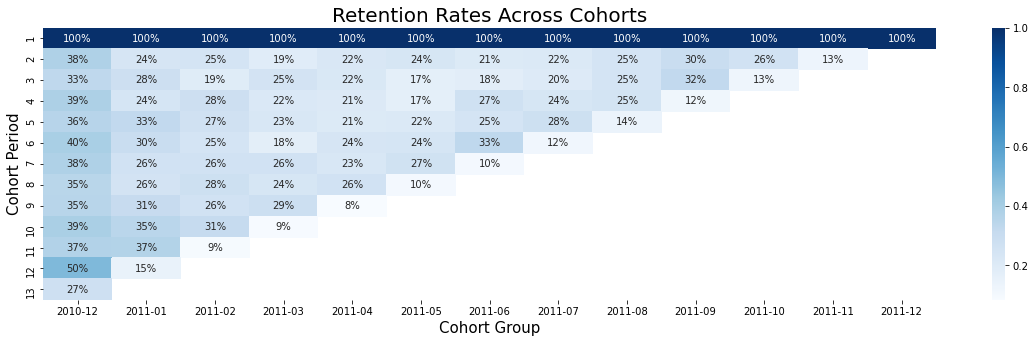

In [42]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_period'], inplace=True)

cohort_sizes = cohorts.groupby(level=0)['total_customers'].first()
user_retention = cohorts['total_customers'].unstack(0).divide(cohort_sizes, axis = 1)
plt.figure(figsize=(20,5))
ax = sb.heatmap(user_retention, annot=True,cmap='Blues', fmt='.0%')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Retention Rates Across Cohorts', fontsize = 20)

## Sales across cohorts

Text(0.5, 1.0, 'Monthly Total Sales Across Cohorts')

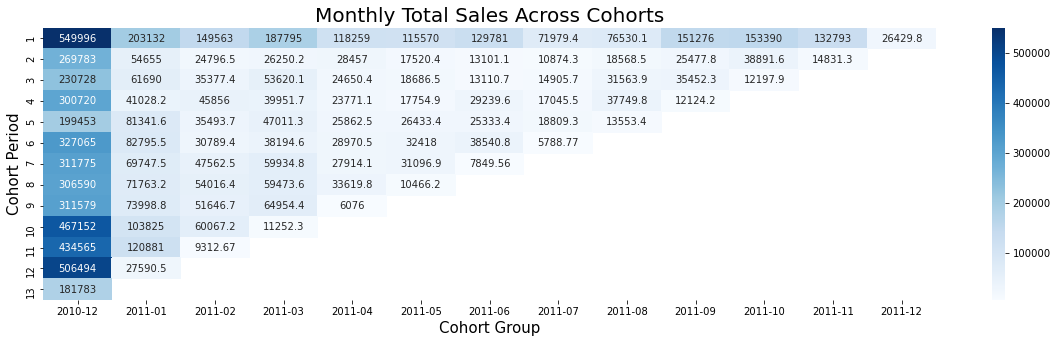

In [43]:
cohorts.reset_index(inplace=True)
cohorts.set_index(['cohort_group', 'cohort_period'], inplace=True)

unstacked_order = cohorts['tot_order'].unstack(0)
plt.figure(figsize=(20,5))
ax = sb.heatmap(unstacked_order, annot=True,cmap='Blues', fmt='g')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Monthly Total Sales Across Cohorts', fontsize = 20)

Text(0.5, 1.0, 'Monthly Active Customers Across Cohorts')

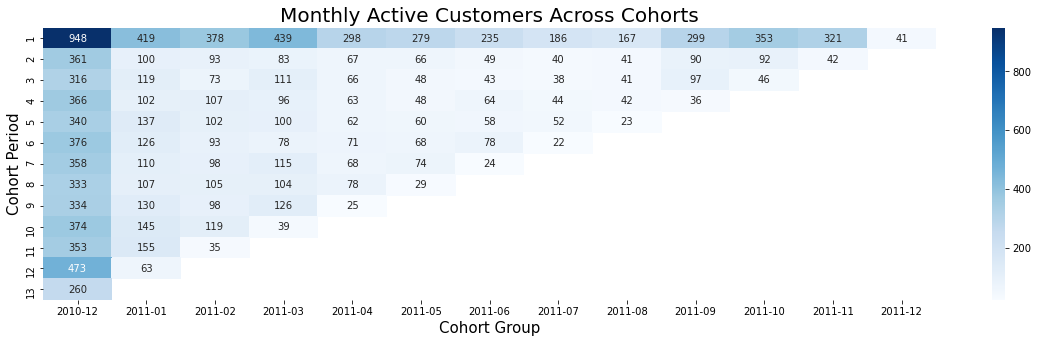

In [44]:
unstacked_cust = cohorts['total_customers'].unstack(0)
plt.figure(figsize=(20,5))
ax = sb.heatmap(unstacked_cust, annot = True, cmap='Blues', fmt = 'g')
ax.set_ylabel('Cohort Period', fontsize = 15)
ax.set_xlabel('Cohort Group', fontsize = 15)
ax.set_title('Monthly Active Customers Across Cohorts', fontsize = 20)